In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Deep Neural Networks 
## Lecture 01

## MP Neuron

<img src='../../prasami_images/prasami_color_tutorials_small.png' width='400' alt="By Pramod Sharma : pramod.sharma@prasami.com"/>

## Import Statements

In [2]:
###-----------------
### Import libraries
###-----------------
from pathlib import Path  # Import Path for file system path operations and management
import numpy as np  # Import NumPy for numerical computations and array operations
import pandas as pd  # Import Pandas for data manipulation and analysis with DataFrames
import matplotlib.pyplot as plt  # Import Matplotlib for creating static, interactive visualizations
import seaborn as sns  # Import Seaborn for statistical data visualization built on Matplotlib

from sklearn.model_selection import train_test_split  # Import function to split dataset into training and testing subsets
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, 
                             ConfusionMatrixDisplay, 
                             f1_score)  # Import function to calculate various metric

In [3]:
###------------------
### Global Parameters
###------------------

# Directories
#inpDir = '../../input' 
inpDir = Path('..') / '..' / 'input'
# outDir = '../output'
outDir = Path('..') / 'output'


RANDOM_STATE = 24 
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

TEST_SIZE  = 0.2 # Size of test data

# Parameters for plotting
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'
         }

CMAP = plt.cm.coolwarm

plt.rcParams.update(params)

plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

## Load data

In [4]:
data_df = pd.read_csv(inpDir/ 'breast_cancer_mod.csv')
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,1,1,0
1,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,1,...,1,0,1,0,1,1,0,1,1,0
3,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


In [5]:
data_df.shape

(569, 31)

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   mean radius              569 non-null    int64
 1   mean texture             569 non-null    int64
 2   mean perimeter           569 non-null    int64
 3   mean area                569 non-null    int64
 4   mean smoothness          569 non-null    int64
 5   mean compactness         569 non-null    int64
 6   mean concavity           569 non-null    int64
 7   mean concave points      569 non-null    int64
 8   mean symmetry            569 non-null    int64
 9   mean fractal dimension   569 non-null    int64
 10  radius error             569 non-null    int64
 11  texture error            569 non-null    int64
 12  perimeter error          569 non-null    int64
 13  area error               569 non-null    int64
 14  smoothness error         569 non-null    int64
 15  compac

In [7]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,0.820738,0.383909,0.0,1.0,1.0,1.0,1.0
mean texture,569.0,0.880492,0.324671,0.0,1.0,1.0,1.0,1.0
mean perimeter,569.0,0.827768,0.377914,0.0,1.0,1.0,1.0,1.0
mean area,569.0,0.954306,0.209005,0.0,1.0,1.0,1.0,1.0
mean smoothness,569.0,0.811951,0.391095,0.0,1.0,1.0,1.0,1.0
mean compactness,569.0,0.910369,0.285904,0.0,1.0,1.0,1.0,1.0
mean concavity,569.0,0.917399,0.275520,0.0,1.0,1.0,1.0,1.0
mean concave points,569.0,0.899824,0.300498,0.0,1.0,1.0,1.0,1.0
mean symmetry,569.0,0.831283,0.374831,0.0,1.0,1.0,1.0,1.0
mean fractal dimension,569.0,0.927944,0.258809,0.0,1.0,1.0,1.0,1.0


In [8]:
for col in data_df.columns:
    print (f'Col: {col} -- {data_df[col].unique()}')

Col: mean radius -- [0 1]
Col: mean texture -- [0 1]
Col: mean perimeter -- [0 1]
Col: mean area -- [0 1]
Col: mean smoothness -- [0 1]
Col: mean compactness -- [0 1]
Col: mean concavity -- [0 1]
Col: mean concave points -- [0 1]
Col: mean symmetry -- [0 1]
Col: mean fractal dimension -- [1 0]
Col: radius error -- [0 1]
Col: texture error -- [1 0]
Col: perimeter error -- [0 1]
Col: area error -- [0 1]
Col: smoothness error -- [1 0]
Col: compactness error -- [1 0]
Col: concavity error -- [1 0]
Col: concave points error -- [1 0]
Col: symmetry error -- [1 0]
Col: fractal dimension error -- [1 0]
Col: worst radius -- [0 1]
Col: worst texture -- [0 1]
Col: worst perimeter -- [0 1]
Col: worst area -- [0 1]
Col: worst smoothness -- [1 0]
Col: worst compactness -- [1 0]
Col: worst concavity -- [0 1]
Col: worst concave points -- [0 1]
Col: worst symmetry -- [1 0]
Col: worst fractal dimension -- [1 0]
Col: target -- [0 1]


<BarContainer object of 2 artists>

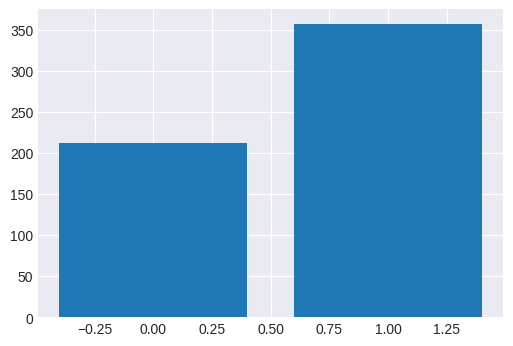

In [9]:
labels = ['Malignant', 'Benign']

fig, ax = plt.subplots(figsize =(6,4))

ax.bar(data_df['target'].value_counts().index, 
       data_df['target'].value_counts().values)

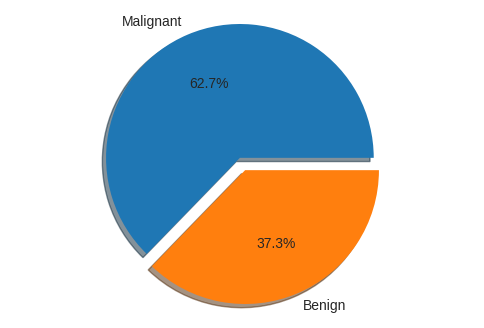

In [10]:
fig, ax = plt.subplots(figsize =(6,4))
explode = (0, 0.1)
ax.pie(data_df['target'].value_counts(), 
       explode=explode, 
       labels=labels, 
       autopct='%1.1f%%', shadow=True, startangle=0
       )
ax.axis('equal');

In [11]:
features = data_df.drop('target', axis =1)
labels = data_df['target']
features.shape, labels.shape

((569, 30), (569,))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    labels, 
                                                    test_size=TEST_SIZE, 
                                                    stratify=labels, 
                                                    random_state=RANDOM_STATE)

In [13]:
X_train['total'] = X_train.astype(np.int16).sum(axis =1)
X_train['target'] = y_train
X_train.sort_values('total', inplace = True)
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,1,1,12,0
2,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,1,0,1,1,13,0
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,13,0
8,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,1,15,0
7,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,15,0


In [14]:
X_train.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
395,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,30,1
333,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,30,1
376,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,30,1
345,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,30,1
335,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,30,1


In [23]:
accuracy = {}
for b in range(X_train.shape[1]):
    X_train['pred'] = X_train['total'] >= b
    accuracy[b] = accuracy_score(X_train['target'], X_train['pred'])


In [25]:
best_b = max(accuracy, key = accuracy.get)
accuracy[best_b]

0.8505494505494505

In [27]:
X_test['total'] = X_test.astype(np.int16).sum(axis =1)
X_test['target'] = y_test
X_test.sort_values('total', inplace = True)
X_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,14,0
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,14,0
12,0,0,0,1,1,0,1,1,0,1,...,0,1,1,0,0,0,0,1,16,0
18,1,1,1,1,0,0,0,1,1,0,...,1,1,0,0,0,0,0,0,18,0
35,0,1,0,0,1,1,0,0,1,1,...,0,0,0,1,1,0,1,1,20,0


In [28]:
X_test['pred'] = X_test['total'] >= best_b
accuracy_score(X_test['target'], X_test['pred'])


0.868421052631579